# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
X.data.shape

(70000, 784)

In [3]:
y.data.shape

(70000,)

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
X.dtype

dtype('float64')

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [7]:
X[36000]


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [8]:
y[36000]

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

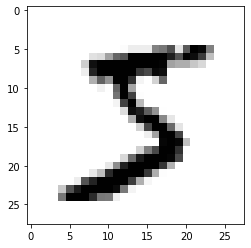

In [4]:
#interpolation = 'nearest' works well when a small image is scaled up
#interpolation = 'none' works well when a big image is scaled down


X_re = X.reshape((70000,28,28))

plt.imshow(X_re[0], cmap= plt.cm.binary, interpolation='nearest' )#I used 'greys' as a cmap, is there any difference??
plt.show()


### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

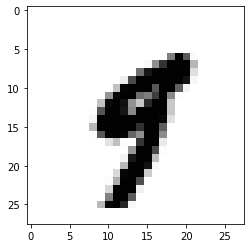

In [5]:
plt.imshow(X_re[36000], cmap= 'Greys', interpolation='nearest' )
plt.show()# yes it is the number it showed us before

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [7]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]
#Use both x and y to make the testing data, not just X

In [8]:
print(f"x_train shape:{X_train.shape}") 
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape:(60000, 784)
y_train shape: (60000,)
x_test shape: (10000, 784)
y_test shape: (10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [28]:
#y_test = np.full(shape=60000,fill_value=5,dtype=np.int) # create a new array with only fives but It doesnt work only rises errors

def five_fil(x):#making a filter to return only True if the number is a 5
    if any(x) == '5': #If I use any() it doesnt return anything, if I dnt use it it doesnt let me use the function bc it is ambiguous
        return True
    else:
        return False
    #for this part of the lab I asked Laura for help with this part
# I use broadcasting to avoid to make loops

vector_filt = np.vectorize(five_fil)

train_5 = vector_filt(y_train).tolist()
test_5 = vector_filt(y_test).tolist()

X_tr_5, y_tr_5, X_tst_5, y_tst_5 = X_train[train_5], y_train[train_5], X_test[test_5], y_test[test_5]

print(f"x_train_5 shape:{X_tr_5.shape}") 
print(f"y_train_5 shape: {y_tr_5.shape}")
print(f"x_test_5 shape: {X_tst_5.shape}")
print(f"y_test_5 shape: {y_tst_5.shape}")


# this returns train and test arrays for ONLY fives
# BUT for classification we need True/False class col -> this y_tr, y_te is not useful
    

x_train_5 shape:(0, 784)
y_train_5 shape: (0,)
x_test_5 shape: (0, 784)
y_test_5 shape: (0,)


In [33]:
y_tr_5 #I only got 5's as an output as we want to

array([], dtype=object)

In [30]:
display(X_tr_5)

array([], shape=(0, 784), dtype=float64)

The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [31]:
from sklearn.linear_model import LogisticRegression

y_train_5 = five_fil(y_train)

model = LogisticRegression(random_state = 0).fit(X_tr_5, y_train_5)
model.score(X_tr_5, y_train_5)

ValueError: Found array with 0 sample(s) (shape=(0, 784)) while a minimum of 1 is required.

In [24]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [51]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Does the classifier predict correctly the 36000th digit we picked before?

In [26]:
prediction = model.predict(X_train[36000])

prediction[36000] == y_train_5[36000]

NameError: name 'model' is not defined

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [13]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?